<h2>Task 1</h2>

Play the betting game at https://gamesfortraders.com/coin-challenge/. The game works like this.

● A biased coin that comes up heads 60% of the time is flipped repeatedly.

● You start with $250 and can bet any available amount of money on the next coin flip.

● Select Heads or Tails and how much money you want to bet.

● If you predicted the outcome of the coin flip correctly, you get back double your bet (if
you bet $10 you get back your original bet and an extra $10).

● If you were wrong about the outcome you get back nothing (you lose the full amount you
bet).

Task: Devise and describe a betting strategy to try and maximize the amount of money you end
up with after 20 bets. Possible examples (these are not optimal)—

● Bet half your remaining money every time and always bet on heads.

● Place 2 bets on heads followed by 1 bet on tails, and always place a $10 bet (or all your
remaining money if you have less than $10 left).

Explain why you think your strategy is a good way to maximize returns when betting on a 60%
biased coin.

Task: Play the game at the link above using the betting strategy you described. Place a total of
20 bets (or fewer if you run out of money). Take a screenshot of the results when you are done.
Be honest! — Show the real results of applying your betting strategy to this game.

<h3>My Results</h3>
<img src='betting-results.png'></img>

<h4>My strategy</h4>

Since the coin was biased towards 60% heads, I used the Kelly Criterion to bet 20% of my capital on heads each time. While my final payout on round 20 may not be optimal, I am confident that if I kept up with the strategy I would have a much bigger pay out since already from 20 runs, we can see that there are more Heads than Tails in the results, as one would expect.

<h2>Task 2</h2>

Task: Implement the coin flip game as well as your betting strategy in a Python simulation. Run
the simulation at least 1000 times and plot a histogram of the amount of money you have left at
the end. Use your results to estimate a 95% confidence interval of the amount of money you will
have left at the end of 20 coin flips using your betting strategy.

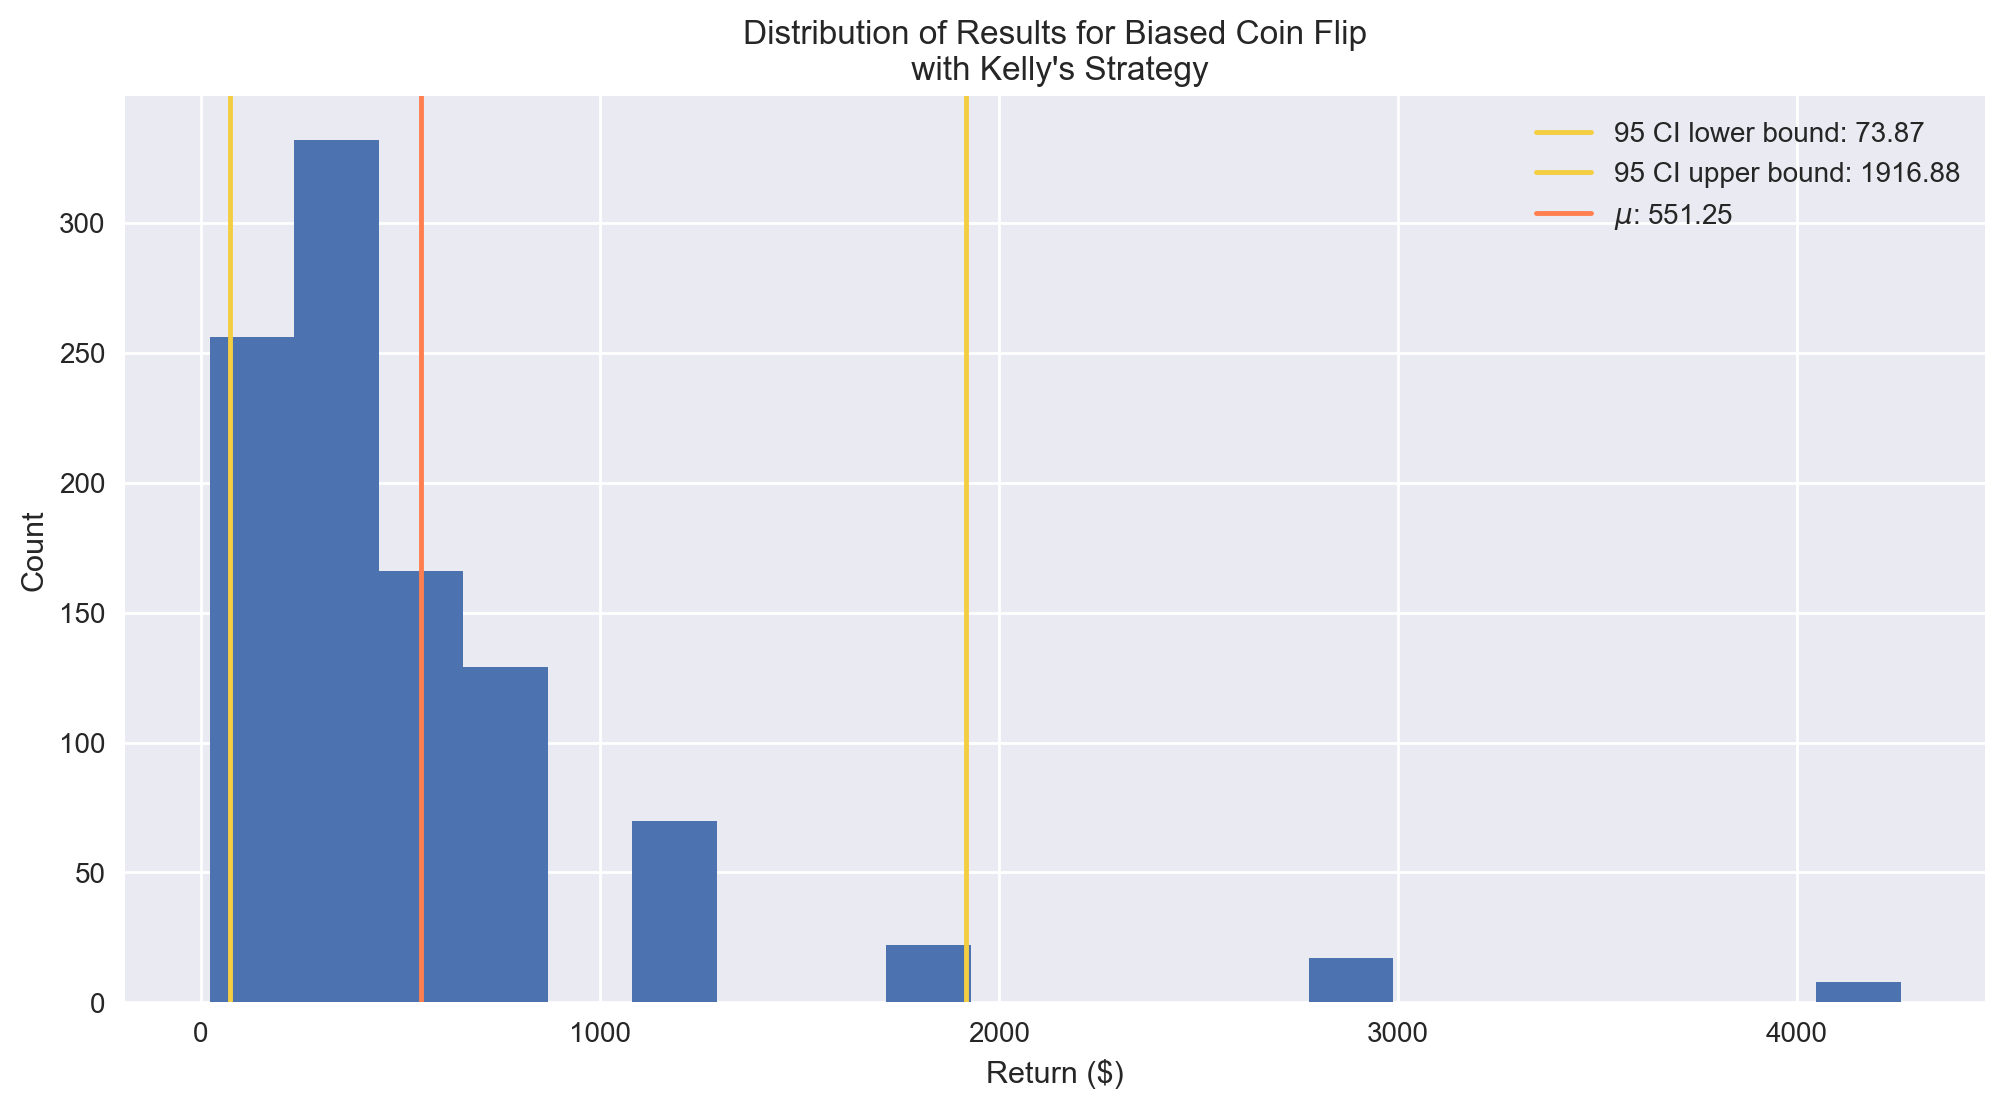

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def biased_coin(n_flips=20, heads_bias=0.6):
    '''
    Assume that we always bet on heads.
    '''
    
    capital = 250
    kelly = 2*heads_bias - 1
    
    for i in range(n_flips):
        investment = capital*kelly
        if np.random.uniform() < 0.6: #Heads
            capital += investment
        else: capital -= investment #Tails
            
    return capital

results = np.zeros(1000)
for i in range(1000):
    results[i] = biased_coin()
    
plt.figure(figsize=(12,6), dpi=200)
a = plt.hist(results, bins=20)
plt.title("Distribution of Results for Biased Coin Flip\n with Kelly's Strategy")
plt.xlabel("Return ($)")
plt.ylabel("Count")
lower_bound, upper_bound = np.percentile(results, [2.5,97.5])
mean = np.mean(results)
plt.axvline(upper_bound, color='#f4ce42', label=f'95 CI lower bound: {round(lower_bound,2)}')
plt.axvline(lower_bound, color='#f4ce42', label=f'95 CI upper bound: {round(upper_bound,2)}')
plt.axvline(mean, color='coral', label=f'$\mu$: {round(mean,2)}')
plt.legend()